### In this project will be applyed different machine learning algotirhms, such as logistic regreesion, decision tree, SVM, random forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


From the beggining it is obvious that 'id' column will be unnecessary

In [3]:
df = df.drop('id', axis = 'columns')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.shape

(5110, 11)

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
len(df[df['bmi'].isna()==True])

201

### The only columns with missing values is BMI
### There are 201 missing value in BMI column, it must be replaced 

C:\Users\aliha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

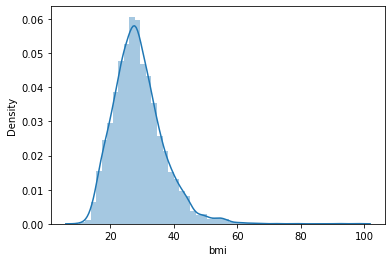

In [7]:
import seaborn as sns
sns.distplot(df['bmi'])

C:\Users\aliha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

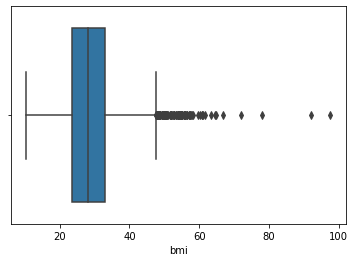

In [8]:
sns.boxplot(df['bmi'])

As shown on plots higher, data is not normally distributed, so change NaN values on mean is good option

In [9]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Number of people from every age group with stroke


In [10]:
dfStroke = df[df['stroke']==1]
AgeGroup1, AgeGroup2 = df[(df['age']>0) & (df['age']<=16)], df[(df['age']>=17) & (df['age']<=36)]
AgeGroup3, AgeGroup4 = df[(df['age']>=37) & (df['age']<=50)], df[(df['age']>=51) & (df['age']<=65)]
AgeGroup5 = df[(df['age']>=66)]
ages = [AgeGroup1, AgeGroup2, AgeGroup3, AgeGroup4, AgeGroup5]
AgeArr = []
for i in range(5):
    AgeArr.append(len(ages[i]))
textAge = ['0-16','17-36','37-50','51-65','65+']


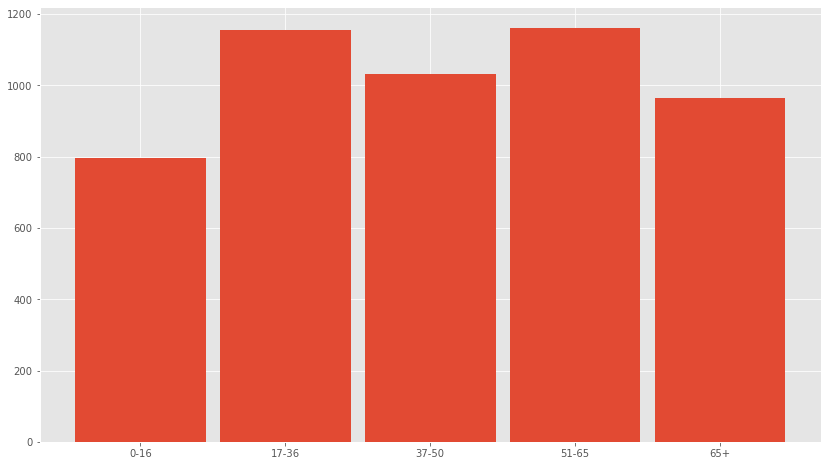

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))
plt.bar(textAge, AgeArr, width=0.9)
plt.show()

In [12]:
cityStroke = [len(dfStroke[dfStroke['Residence_type']=='Urban']), len(dfStroke[dfStroke['Residence_type']=='Rural'])]
cityStroke

[135, 114]

In [13]:
df[(df['age']>0) & (df['age']<=16)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.900000,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.000000,Unknown,0
251,Female,8.00,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
253,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,0.72,0,0,No,children,Rural,62.13,16.800000,Unknown,0
5094,Male,13.00,0,0,No,children,Urban,82.38,24.300000,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.400000,Unknown,0
5098,Male,9.00,0,0,No,children,Urban,71.88,17.500000,Unknown,0


Next step is to get rid of all categorical data, first column is gender, male - 0, female - 1, next column is ever married, Yes - 1, No - 0

Residence type: Urban - 0, rural - 1

In [14]:
# accidently there was 'Other' gender, so it was just dropped
df = df[df['gender'] != 'Other']
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['ever_married'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Residence_type'].replace(['Urban','Rural'], [0, 1], inplace=True)
df

C:\Users\aliha\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,1,202.21,28.893237,never smoked,1
2,0,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1
3,1,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1
4,1,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,Private,0,83.75,28.893237,never smoked,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,1,Private,1,166.29,25.600000,formerly smoked,0


In next cell will be used pandas method factorise to it quicker 

In [15]:
df['work_type_num'] = pd.factorize(df['work_type'])[0]
df

C:\Users\aliha\AppData\Local\Temp/ipykernel_3748/591832393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type_num'] = pd.factorize(df['work_type'])[0]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_num
0,0,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1,0
1,1,61.0,0,0,1,Self-employed,1,202.21,28.893237,never smoked,1,1
2,0,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1,0
3,1,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1,0
4,1,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,Private,0,83.75,28.893237,never smoked,0,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.000000,never smoked,0,1
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.600000,never smoked,0,1
5108,0,51.0,0,0,1,Private,1,166.29,25.600000,formerly smoked,0,0


### Categorical data and numerical data for 'Work type' column

In [16]:
import numpy as np
a = df['work_type'].value_counts()
workType = pd.DataFrame(np.arange(5), a.index) # Numpy 'arange' was used because it is faster than list comprehension
workType

,0
Private,0
Self-employed,1
children,2
Govt_job,3
Never_worked,4


In [17]:
df['smoking_status_num'] = pd.factorize(df['smoking_status'])[0]

C:\Users\aliha\AppData\Local\Temp/ipykernel_3748/2426715440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status_num'] = pd.factorize(df['smoking_status'])[0]


### Categorical data and numerical data for 'Smoking status' column

In [18]:
smokingStatus = pd.DataFrame(np.arange(4), df['smoking_status'].value_counts().index)
smokingStatus

,0
never smoked,0
Unknown,1
formerly smoked,2
smokes,3


### Now drop columns with categorical variables

In [19]:
df.drop(['work_type','smoking_status'], axis = 'columns', inplace=True)
df

C:\Users\aliha\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_num,smoking_status_num
0,0,67.0,0,1,1,0,228.69,36.600000,1,0,0
1,1,61.0,0,0,1,1,202.21,28.893237,1,1,1
2,0,80.0,0,1,1,1,105.92,32.500000,1,0,1
3,1,49.0,0,0,1,0,171.23,34.400000,1,0,2
4,1,79.0,1,0,1,1,174.12,24.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,83.75,28.893237,0,0,1
5106,1,81.0,0,0,1,0,125.20,40.000000,0,1,1
5107,1,35.0,0,0,1,1,82.99,30.600000,0,1,1
5108,0,51.0,0,0,1,1,166.29,25.600000,0,0,0


### Create target and main dataset

In [20]:
X = df.drop('stroke', axis = 'columns')
Y = df.stroke

### Split dataset for test and train

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Creating of object

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

C:\Users\aliha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy with logistic regression is 96%

In [26]:
model.score(X_test, y_test)

0.9461839530332681

C:\Users\aliha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: x and y must be the same size

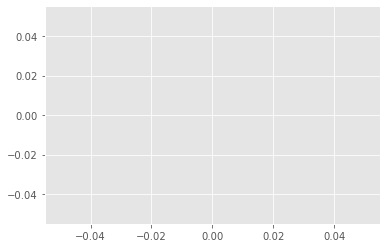

In [25]:
#sns.regplot(df['stroke'])

## Number of people from every age group with stroke


In [27]:
dfStroke = df[df['stroke']==1]
AgeGroup1, AgeGroup2 = df[(df['age']>0) & (df['age']<=16)], df[(df['age']>=17) & (df['age']<=36)]
AgeGroup3, AgeGroup4 = df[(df['age']>=37) & (df['age']<=50)], df[(df['age']>=51) & (df['age']<=65)]
AgeGroup5 = df[(df['age']>=66)]
ages = [AgeGroup1, AgeGroup2, AgeGroup3, AgeGroup4, AgeGroup5]
AgeArr = []
for i in range(5):
    AgeArr.append(len(ages[i]))
textAge = ['0-16','17-36','37-50','51-65','65+']

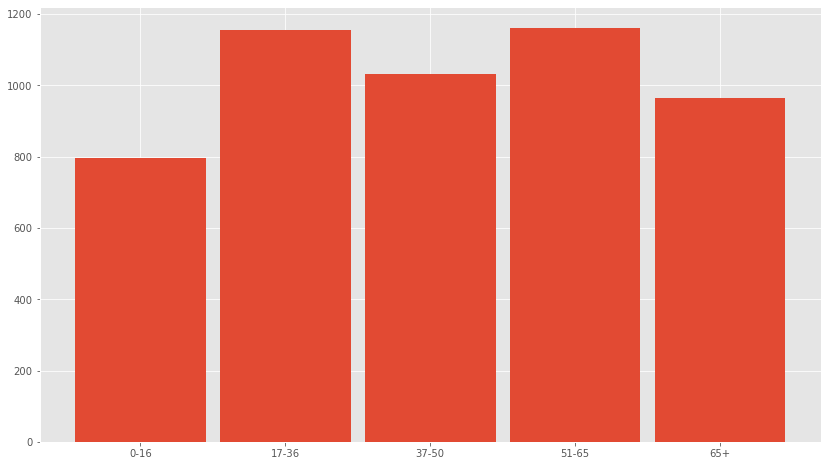

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))
plt.bar(textAge, AgeArr, width=0.9)
plt.show()

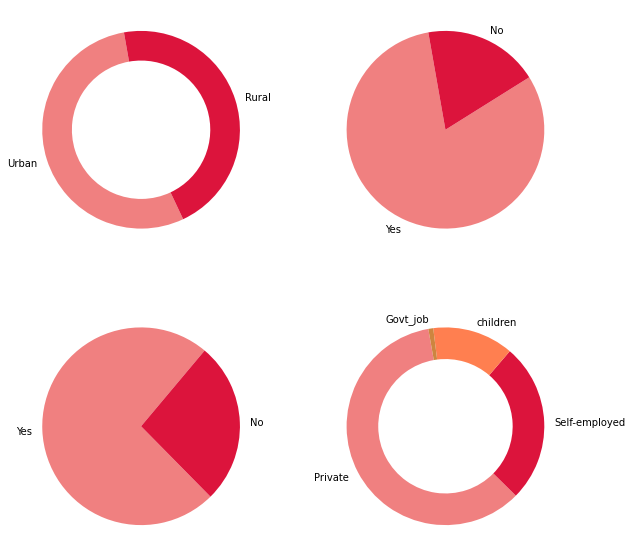

In [52]:
cityStroke = [len(dfStroke[dfStroke['Residence_type']==0]), len(dfStroke[dfStroke['Residence_type']== 1])]

heartStroke = [len(dfStroke[dfStroke['heart_disease']==0]), len(dfStroke[dfStroke['heart_disease']== 1])]

hypertensionStroke = [len(dfStroke[dfStroke['hypertension']==0]), len(dfStroke[dfStroke['hypertension']== 1])]

workTypeStrole = []
for i in range(0,4):
    workTypeStrole.append(len(dfStroke[dfStroke['work_type_num']==i]))
workTypeStr = workType.index[:4]


fig, axes = plt.subplots(2,2)

axes[0][0].pie(cityStroke, labels=['Urban', 'Rural'],startangle=100, colors=['lightcoral', 'crimson'], wedgeprops=dict(width=0.3) )
axes[0][1].pie(heartStroke, labels=['Yes','No'],colors=['lightcoral', 'crimson'],startangle=100)
axes[1][0].pie(hypertensionStroke, labels=['Yes','No'],colors=['lightcoral', 'crimson'],startangle=1490)
axes[1][1].pie(workTypeStrole, labels = workTypeStr,startangle=100, colors=['lightcoral', 'crimson', 'coral', 'peru'], wedgeprops=dict(width=0.32) )


fig.set_figheight(10)
fig.set_figwidth(10)


### In next cells will be shown linear dependencies of age to stroke with logistic regression

<AxesSubplot:>

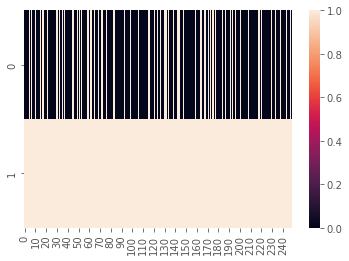

In [31]:
cor1 = [dfStroke['hypertension'],dfStroke['stroke']]
sns.heatmap(cor1)

<BarContainer object of 2 artists>

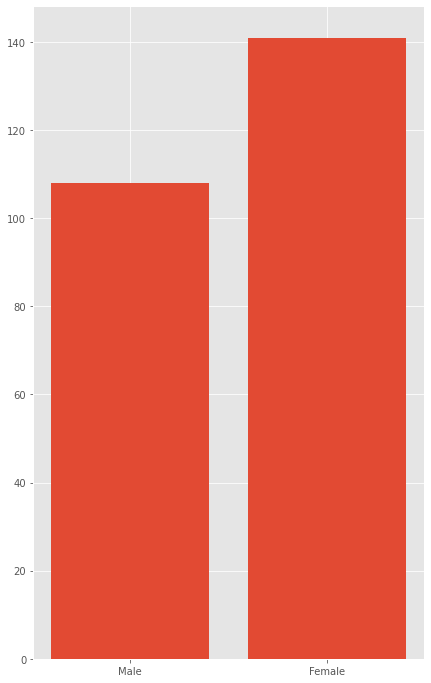

In [49]:
xpose = ['Male', 'Female']
plt.figure(figsize=(7,12))
#plt.bar(xpose, [len(df[df['gender']==0]), len(df[df['gender']==1])],
#        color = 'royalblue')
plt.bar(xpose, [len(dfStroke[dfStroke['gender']==0]), len(dfStroke[dfStroke['gender']==1])])

In [43]:
len(dfStroke)

249

In [63]:
smokeTypeStroke = []
for i in range(0,4):
    smokeTypeStroke.append(len(dfStroke[dfStroke['smoking_status_num']==i]))
smokeTypeStr = smokingStatus.index
smokeTypeStroke

[70, 90, 42, 47]

Text(0.5, 1.0, 'Types of smokes with stroke')

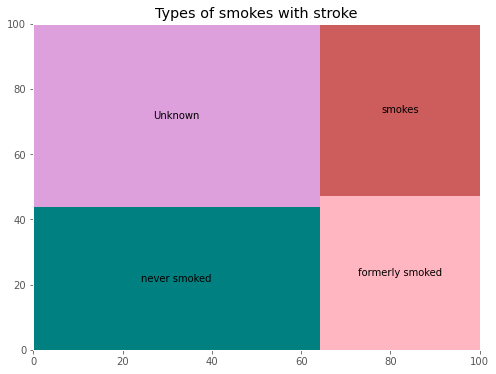

In [75]:
import squarify
plt.figure(figsize=(8,6))
colors = ['teal','plum','lightpink','indianred']
squarify.plot(smokeTypeStroke, label=smokeTypeStr, color=colors)
plt.title('Types of smokes with stroke')


C:\Users\aliha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aliha\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

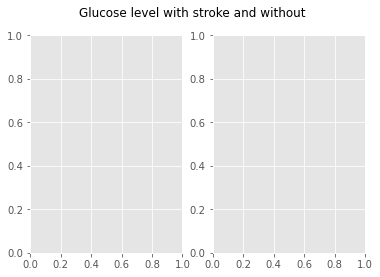

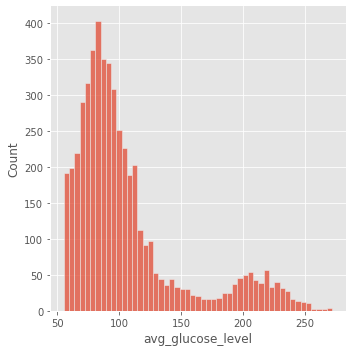

In [84]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Glucose level with stroke and without')
sns.displot(df['avg_glucose_level'])
sns.lineplot(dfStroke['avg_glucose_level'],)
